In [2]:
import yt
from yt import YTArray
from yt import YTQuantity
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import astropy.constants as const
import numpy as np

import yt_functions as ytf


yt : [INFO     ] 2019-10-17 11:12:39,891 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-17 11:12:39,892 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-17 11:12:39,964 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-17 11:12:39,964 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-17 11:12:39,965 Parameters: cosmological_simulation   = 0.0


In [46]:

folder = 'isothermal_btest'
output = 0
ds = ytf.load('../../simulations/%s/DD%04d/DD%04d'%(folder, output, output))

ad = ds.all_data()



z = ad[('gas', 'z')].in_units('kpc')
rho = ad[('gas', 'density')]
g = ad[('gas', 'external_acceleration_z')]
T = ad[('gas', 'temperature')]
H = YTQuantity(43.853572, 'kpc')
a = 0.1 * H

drhodz = rho * z / (a * H  * np.sqrt(1 + (z/a)**2))
dpdz = drhodz * kb* T / mu / mp
rhog = rho*g


plt.plot(z, (dpdz + rhog) / dpdz)
#plt.yscale('symlog')
#plt.ylim(-2e-2, 2e-2)
#plt.ylim(-.01, .01)
plt.show()

yt : [INFO     ] 2019-10-17 14:11:30,379 Parameters: current_time              = 0
yt : [INFO     ] 2019-10-17 14:11:30,379 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2019-10-17 14:11:30,380 Parameters: domain_left_edge          = [-3. -3. -3.]
yt : [INFO     ] 2019-10-17 14:11:30,381 Parameters: domain_right_edge         = [3. 3. 3.]
yt : [INFO     ] 2019-10-17 14:11:30,382 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-10-17 14:11:30,386 Gathering a field list (this may take a moment.)


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

(array([  32768.,       0.,   32768.,       0.,   32768.,       0.,
          32768.,   32768.,   98304., 1835008.]),
 YTArray([-0.9605441 , -0.86465866, -0.76877322, -0.67288777, -0.57700233,
          -0.48111689, -0.38523144, -0.289346  , -0.19346056, -0.09757512,
          -0.00168967]) (dimensionless),
 <a list of 10 Patch objects>)

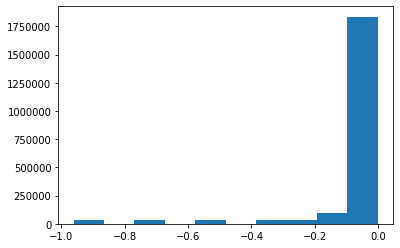

In [26]:
plt.hist((dpdz + rhog) / dpdz)
#plt.xscale('log')
#plt.xlim(1e-8, 1e2)